In [97]:
from os import listdir
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tslearn.clustering import KShape
from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

from datetime import datetime

In [3]:
pickel_path = "YOUR_PATH\\data\\pickels"
all_feature_names = ["CarCount", "CargoCount", "CargoLength", "CargoSpeedMax", "CargoSpeedMin", "CarSpeedMin", "CarSpeedMax", "CargoSpeedMean", "CarSpeedMean"]

In [4]:
pickels_to_read = ["CarCount"] # "CargoCount", "CargoLength", "CargoSpeedMax", "CargoSpeedMin", "CarSpeedMin", "CarSpeedMax", "CargoSpeedMean", "CarSpeedMean"
pickels_data = []
for feature_name in pickels_to_read:
  pickels_data.append(pd.read_pickle(f"{pickel_path}\\{feature_name}_2016.pkl").reset_index(drop=True))

In [5]:
# Goal is to get three mondays from three weeks in February, take a mean and see if clears a bit of noise

In [6]:
data = pickels_data[0]
selected_feature = pickels_to_read[0]

In [7]:
def get_first_weekday_of_month(year, month, weekday):
  first_day = datetime(year, month, 1)
  first_weekday = first_day.weekday()
  day_of_week_delta = weekday - first_weekday  if first_weekday < weekday else 7 - weekday
  return (first_day.timetuple().tm_yday + day_of_week_delta % 7) - 1

def blur(data, blur_range):
  data_len = len(data)
  blurred = []
  for i in range(data_len):
    sum = 0
    count = 0
    for j in range(i-1, i+blur_range+1):
      if j < 0 or j > data_len-1:
        continue
      sum += data[j]
      count += 1
    sum += data[i]*2
    blurred.append(sum / (count+2))
  return blurred

def create_dir_if_missing(file_path):
  dir_path = os.path.dirname(file_path)
  if not os.path.exists(dir_path):
      try:
          os.makedirs(dir_path)
      except OSError as exc: # Guard against race condition
          if exc.errno != errno.EEXIST:
              raise

In [8]:
day_names = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

def plot_features_and_their_average(start_day_index, number_of_days, data, lam_id, weekday_index, save_path="", smoothing=0):
  days = [start_day_index + x * 7 for x in range(number_of_days)]
  days_index = data["dayIndex"].isin(days)
  selected_days_data = data[days_index]
  casted_values = selected_days_data["values"].apply(lambda x: x.astype(int))
  selected_days_data["values"].loc[:] = casted_values

  grouped_data = selected_days_data.groupby("lamId")
  selected_group = grouped_data.get_group(lam_id)
  mean = blur(selected_group["values"].mean(), smoothing)

  x = range(288)
  plt.plot(x, mean, label = "Mean", linewidth=3)
  for i in range(number_of_days):
    plt.plot(x, selected_group.iloc[i]["values"], label = f"Day {i+1}", linestyle=":", linewidth=1)
  plt.legend()
  plt.title(f"LamId {lam_id}, {number_of_days} x {day_names[weekday_index]}{'s' if number_of_days > 1 else ''} with {smoothing}px smoothing on mean")

  if len(save_path) > 0:
    image_path = f"{save_path}\\{lam_id}\\fromday_{start_day_index}_daysforward_{number_of_days}_smoothing_{smoothing}px_lamid_{lam_id}.png"
    create_dir_if_missing(image_path)
    plt.savefig(image_path)
  
  plt.show()

def interpolate_data(data):
  series = pd.Series(data)
  series.replace(0, np.NaN, inplace=True)
  asnumpy = series.interpolate().values
  return asnumpy
  

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


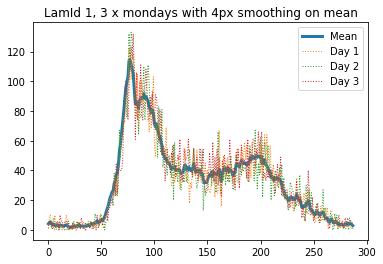

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


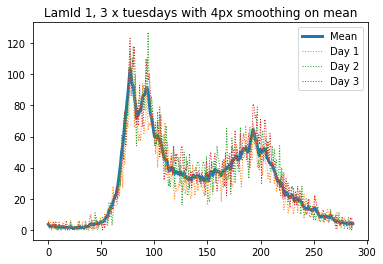

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


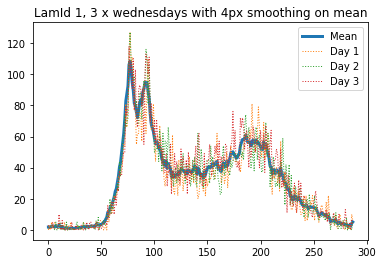

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


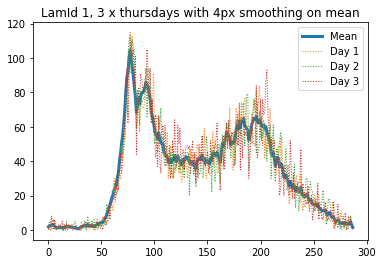

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


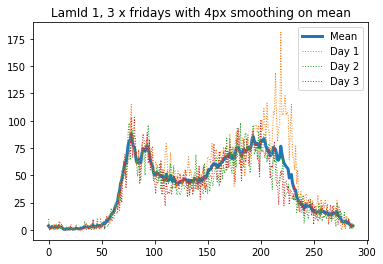

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


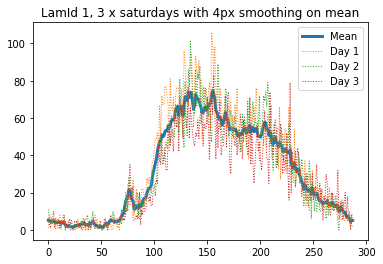

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


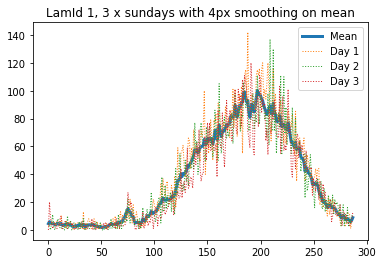

In [9]:
for i in range(7):
  first_monday_of_february = get_first_weekday_of_month(2016, 2, i)
  fig_save_path = f"YOUR_PATH\\plots\\several_points_averaged\\{selected_feature}"
  plot_features_and_their_average(first_monday_of_february, 3, data, "1", i, fig_save_path, 4)

In [31]:
def process_data(start_day_index, number_of_days, data, smoothing=0):
  days = [start_day_index + x * 7 for x in range(number_of_days)]
  days_index = data["dayIndex"].isin(days)
  selected_days_data = data[days_index]
  casted_values = selected_days_data["values"].apply(lambda x: x.astype(int))
  selected_days_data["values"].loc[:] = casted_values

  grouped_data = selected_days_data.groupby("lamId")
  
  means = grouped_data["values"].mean()
  lam_ids = means.reset_index()["lamId"]
  smoothed_means = blur(means, smoothing)

  return pd.DataFrame({
    "lamId": lam_ids,
    "means": smoothed_means
  })
  

In [119]:
start_day = 32
number_of_days = 3
smoothing_factor = 3

processed_data = process_data(start_day, number_of_days, data, smoothing_factor)

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
def build_distance_matrix(data):
  datapoint_count = data.shape[0]
  means = data["means"]
  distances = np.zeros((datapoint_count, datapoint_count))
  for i in range(datapoint_count):
    for j in range(i, datapoint_count):
      dtw_val = dtw(means.loc[i], means.loc[j])
      distances[i][j] = dtw_val
      distances[j][i] = dtw_val
  return distances

In [112]:
dist = build_distance_matrix(processed_data)


In [120]:

data_as_numpy = processed_data["means"].to_numpy()

In [121]:
dataset = to_time_series_dataset(data_as_numpy)
kmeans = TimeSeriesKMeans(3, metric="dtw")
fitted = kmeans.fit(dataset)

In [122]:
preds = fitted.predict(dataset)

In [123]:
np.unique(preds)

array([0, 1, 2], dtype=int64)

In [117]:
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [118]:
print(processed_data["lamId"].to_list())

['1', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '149', '150', '151', '152', '153', '155', '156', '158', '159', '160', '1601', '1602', '1603', '1604', '1605', '1606', '1607', '162', '163', '164', '165', '167', '168', '169', '175', '176', '177', '178', '179', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '201', '203', '204', '205', '206', '207', '208', '209', '210', '211', '221', '223', '224', '225', '226', '227', '230', '231', '232', '233', '234', '235', '237', '238', '239', '240', '242', '243', '244', '245', '247', '248', '249', '251', '252', '254', '255', '257', '302', '303', '304', '305', '306', '401', '402', '403', '404', '405', '406', '407', '408', '409', '421', '422', 

In [129]:
data.groupby("dayIndex").count().max(axis=1).max()

223